# Basit Doğrusal Regresyon

burda tek değişkeni baz olarak bi modelleme yaparız(mesela burda sadece tv ve ona bağlı sales ı kullandık)

## Model 

Veri Seti

In [5]:
import pandas as pd
df=pd.read_csv("Advertising.csv")
df=df.iloc[:,1:len(df)]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


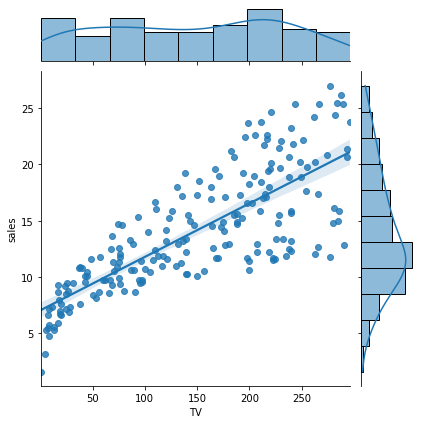

In [7]:
import seaborn as sns
sns.jointplot(x="TV",y="sales",kind="reg",data=df);

In [8]:
X=df[["TV"]]

In [9]:
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [10]:
y=df[["sales"]]

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
reg=LinearRegression()#bir regresyon(sayısal olan bağımlı değer) modeli oluşturuldu

In [13]:
model=reg.fit(X,y)#bunu fit ettik x ve y e göre

In [14]:
model#burda modelin oluştuğuna dair bazı bigiler yazıyo bende yazmıyo anlamadım bazı parametlere fln filan

LinearRegression()

In [15]:
dir(model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_residues',
 '_set_intercept',
 '_validate_data',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'normalize',
 'positive',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [16]:
#yi=b0+b1.x1+e1 #gerçek değerimiz (e1 hata)

In [17]:
#yi=b0+b1.x1 #tahmin modelimiz

In [18]:
model.intercept_#0 ı kesen nokta yani b0 

array([7.03259355])

In [19]:
model.coef_#katsayı(b1)

array([[0.04753664]])

In [20]:
#rkare
model.score(X,y)

0.611875050850071

In [21]:
#rkare skoru=satışlardaki değişikliğin(bağımlı değişken(y)) ½60 ı tv değişkenlerince(bağımsız değişken (x)) açıklanabilinmiş

## Tahmin

C:\Users\kadosama\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


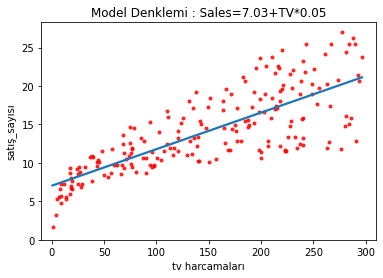

In [22]:
import matplotlib.pyplot as plt
g=sns.regplot(df["TV"],df["sales"],ci=None,scatter_kws={"color":"r","s":9})
g.set_title("Model Denklemi : Sales=7.03+TV*0.05")
g.set_ylabel("satış_sayısı")
g.set_xlabel("tv harcamaları")
plt.xlim(-10,310)
plt.ylim(bottom=0); #mavi çizgi modelin tahmin ettiği değerler kırmızı noktalar ise gerçek değerler

In [23]:
#modelin tahmin değerleri =mavi çizgi
#veri değerleri= kırmızı noktalar

Sales=7.03+TV*0.05

In [24]:
7.03+165*0.05#el yordamıyla tahmin
model.intercept_+165*model.coef_

array([[14.87613922]])

In [25]:
model.predict([[165]])#sklearn ile

array([[14.87613922]])

In [26]:
model.predict([[400]])#bizim veri 300e kadar mesela ama 400 ü bile hesaplar çünkü artık modellemesini yaptık artık. her değer için artık bu model kullanılabilir

array([[26.04724972]])

In [27]:
yeni_veri=[[5],[15],[30]]
model.predict(yeni_veri)

array([[7.27027675],
       [7.74564316],
       [8.45869276]])

# Artıklar ve makine öğrenmesindeki önemi(model tunning)

## MSE: Hata kareleri ortalaması
## RMSE: Hata kareleri ortalamasının karekökü

In [28]:
y[0:10]#gerçek değerler

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
5,7.2
6,11.8
7,13.2
8,4.8
9,10.6


In [29]:
model.predict(X)[0:10]#modelin tahmin ettiği değerler

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814],
       [ 7.44616232],
       [ 9.76595037],
       [12.74649773],
       [ 7.44140866],
       [16.53041431]])

In [30]:
gerçek_y=y[0:10]
tahmin_y=pd.DataFrame(model.predict(X)[0:10])
hatalar=pd.concat([gerçek_y,tahmin_y],axis=1)
hatalar

,sales,0
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [31]:
hatalar.columns=["gerçek_y","tahminedilen_y"]

In [32]:
hatalar

,gerçek_y,tahminedilen_y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [33]:
hatalar["hata"]=hatalar["gerçek_y"]-hatalar["tahminedilen_y"]

In [34]:
hatalar

,gerçek_y,tahminedilen_y,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [35]:
hatalar["hata_kareler"]=hatalar["hata"]**2

In [36]:
hatalar

,gerçek_y,tahminedilen_y,hata,hata_kareler
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [37]:
import numpy as np
np.mean(hatalar["hata_kareler"])#hata kareleri ort u  (mse)

9.290350329638105

# Çoklu doğrusal regresyon 

## Model

Veri Seti

In [38]:
df=pd.read_csv("Advertising.csv")
df=df.iloc[:,1:len(df)]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [39]:
x=df.drop("sales",axis=1)
y=df[["sales"]]

In [40]:
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [41]:
x.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [42]:
#statsmodel ile model kurmak(istatiski bi model kurduk(yani daha detaylı)

In [43]:
import statsmodels.api as sm

In [44]:
lm=sm.OLS(y,x)

In [45]:
model=lm.fit()#x ve y yi ztn kullandık ondan parametre girmedik farketmiyo o tam tersi de olabilir

In [46]:
model.summary()#model çıktısı

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              3566.
Date:                Tue, 01 Feb 2022   Prob (F-statistic):                   2.43e-171
Time:                        16:56:13   Log-Likelihood:                         -423.54
No. Observations:                 200   AIC:                                      853.1
Df Residuals:                     197   BIC:                                      863.0
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0538      0.001     40.507      0.000       0.051       0.056
radio          0.2222      0.009     23.595      0.000       0.204       0.241
newspaper      0.0168      0.007      2.517      0.013       0.004       0.030
==============================================================================
Omnibus:                        5.982   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                7.039
Skew:                          -0.232   Prob(JB):                       0.0296
Kurtosis:                       3.794   Cond. No.                         12.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
#skilearn ile model kurma(burda detaylara anlamlılığa bakmayız burda sadece işlemin doğru tahmin edilmesi tahmin gücünün artırılması amaçlanır)

In [48]:
#skilearn ve statsmodels modelleri sonucu çıkan katsayılar farklı olabilir çünkü arkada çalışan algoritmalar farklı

In [49]:
lm=LinearRegression()

In [50]:
model=lm.fit(x,y)

In [51]:
model.intercept_

array([2.93888937])

In [52]:
model.coef_

array([[ 0.04576465,  0.18853002, -0.00103749]])

## Tahmin

Sales=2.94+0.04*TV+0.19*radio-newspaper*0.001

In [53]:
#el yordamıyla hesaplama

In [54]:
TV=30
radio=10
newspaper=40

In [55]:
2.94+0.04*TV+0.19*radio-newspaper*0.001

5.999999999999999

In [56]:
yeni_veri=[[30],[10],[40]]

In [57]:
yeni_veri=pd.DataFrame(yeni_veri).T

In [58]:
yeni_veri

,0,1,2
0,30,10,40


In [59]:
model.predict(yeni_veri)

array([[6.15562918]])

In [60]:
#makine yordamıyla hatayı bulma

In [61]:
from sklearn.metrics import mean_squared_error

In [62]:
y[0:10]

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
5,7.2
6,11.8
7,13.2
8,4.8
9,10.6


In [63]:
model.predict(x)[0:10]

array([[20.52397441],
       [12.33785482],
       [12.30767078],
       [17.59782951],
       [13.18867186],
       [12.47834763],
       [11.72975995],
       [12.12295317],
       [ 3.72734086],
       [12.55084872]])

In [64]:
mse=mean_squared_error(y,model.predict(x))
mse

2.784126314510936

In [65]:
rmse=np.sqrt(mse)
rmse

1.6685701407225697

# Model tunning (model doğrulama)

In [66]:
x.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [67]:
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [68]:
#sınama seti (holdout yöntemi ile)
from sklearn.model_selection import train_test_split

In [69]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,#yüzde20si test
                                              random_state=99)#sürekli farklı değer gelmesin die sabitledik

In [70]:
x_train.head()

,TV,radio,newspaper
16,67.8,36.6,114.0
51,100.4,9.6,3.6
97,184.9,21.0,22.0
164,117.2,14.7,5.4
71,109.8,14.3,31.7


In [71]:
y_train.head()

,sales
16,12.5
51,10.7
97,15.5
164,11.9
71,12.4


In [72]:
x_test.head()

,TV,radio,newspaper
135,48.3,47.0,8.5
127,80.2,0.0,9.2
191,75.5,10.8,6.0
66,31.5,24.6,2.2
119,19.4,16.0,22.3


In [73]:
y_test.head()

,sales
135,11.6
127,8.8
191,9.9
66,9.5
119,6.6


In [74]:
lm=LinearRegression()
model=lm.fit(x_train,y_train)


In [75]:
#eğitim hatası
np.sqrt(mean_squared_error(y_train,model.predict(x_train)))

1.7236824822650751

In [76]:
#test hatası
np.sqrt(mean_squared_error(y_test,model.predict(x_test)))

1.4312783138301641

In [77]:
#random state 99 kullandık sabitlendi ama random state olmasa hangi 80 hangi 20 olduğunu bilmediğimiz ve sürekli rastgele alacağından dolayı k katlı cv yi kullanıoz

In [78]:
#k-katlı cross validation

In [79]:
from sklearn.model_selection import cross_val_score

In [80]:
cross_val_score(model,x_train,y_train,cv=10,#10katlı cv olsun
               scoring="neg_mean_squared_error")#hata kareleri ortunu skor olarak aldık r'2 de alınabilirdi

array([-2.1019073 , -2.48953197, -3.09704214, -2.34694216, -3.68175761,
       -1.8691401 , -3.18173007, -4.1927349 , -2.17128376, -8.03821974])

In [81]:
np.mean(-cross_val_score(model,x_train,y_train,cv=10,scoring="neg_mean_squared_error"))#cv mse

3.317028974234127

In [82]:
#k krossda eğitim setini 10 parçaya bölüp bu parçaların 9 unun train edip 1ini test ediyoruz ve 1 hata ortalaması elde ediyoruz geri kalan parçalarda da bunu uygularsak 3.31 toplam ortalama 3.31 i elde ediyoruz

In [83]:
np.sqrt(np.mean(-cross_val_score(model,x_train,y_train,cv=10,scoring="neg_mean_squared_error")))#cv rmse

1.821271252239525

In [84]:
#bunlar train seti özelinde

In [85]:
#bunlar daha doğru  hata almak üzere yapılan doğrulama işlemi doğrlanmıştır bunlar

# Ridge regresyon

In [86]:
#burda da hatakareleri ortalaması var ama ekstradan burdan bulacağımız katsayılar ceza uyguluyoruz hko+landa*b^2 gibi
#landa veya alpha burda bizim cezayı uygulayacağımız bleri ayarlama katsayısıdır bunu biz seçeriz en uygun alpha değeriyle de modeli en az hataya indirgeriz

In [87]:
from sklearn import model_selection
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error,r2_score


Veri Seti

In [88]:
df=pd.read_csv("Hitters.csv")
df=df.dropna()
dms=pd.get_dummies(df[["League","Division","NewLeague"]])
y=df["Salary"]
x_=df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
x=pd.concat([x_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [89]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [90]:
df.shape

(263, 20)

In [91]:
ridge_model=Ridge(alpha=0.1).fit(x_train,y_train)#sonuna bağlayarak da yapılabilir alpha veya landa bu katsayılarla oynayan bi değer biz hatası az olanı seçip optimumu yakalıcaz

In [92]:
ridge_model

Ridge(alpha=0.1)

In [93]:
ridge_model.coef_#bağımsız deişken sayısı kadar coef verdi

array([ -1.77435737,   8.80240528,   7.29595605,  -3.33257639,
        -2.08316481,   5.42531283,   7.58514945,  -0.13752764,
        -0.20779701,  -0.60361067,   1.7927957 ,   0.72866408,
        -0.68710375,   0.26153564,   0.26888652,  -0.52674278,
       112.14640272, -99.80997876, -48.07152768])

In [94]:
ridge_model.intercept_

-4.578626905722331

In [95]:
lambdalar=10**np.linspace(100,-2,100)*0.5

In [96]:
ridge_model=Ridge()
katsayılar=[]
for i in lambdalar:
    ridge_model.set_params(alpha=i)
    ridge_model.fit(x_train,y_train)
    katsayılar.append(ridge_model.coef_)
    

In [97]:
katsayılar

[array([ 1.14909037e-93,  3.78479139e-94,  5.88123295e-95,  2.00975767e-94,
         2.09761647e-94,  1.68970393e-94,  3.58683321e-95,  2.22006018e-92,
         6.50831310e-93,  7.60237824e-94,  3.40296879e-93,  3.28778354e-93,
         2.39720154e-93,  1.92484825e-93,  1.63953486e-94,  2.59976485e-96,
         2.72298721e-97, -1.51713192e-96,  3.77085474e-97]),
 array([ 1.23213194e-92,  4.05830775e-93,  6.30625332e-94,  2.15499727e-93,
         2.24920539e-93,  1.81181414e-93,  3.84604368e-94,  2.38049776e-91,
         6.97865080e-92,  8.15178100e-93,  3.64889189e-92,  3.52538253e-92,
         2.57044064e-92,  2.06395169e-92,  1.75801949e-93,  2.78764263e-95,
         2.91976993e-96, -1.62677083e-95,  4.04336394e-96]),
 array([ 1.32117469e-91,  4.35159038e-92,  6.76198873e-93,  2.31073294e-92,
         2.41174922e-92,  1.94274892e-92,  4.12398658e-93,  2.55252972e-90,
         7.48297851e-91,  8.74088756e-92,  3.91258717e-91,  3.78015213e-91,
         2.75619924e-91,  2.21310774e-91, 

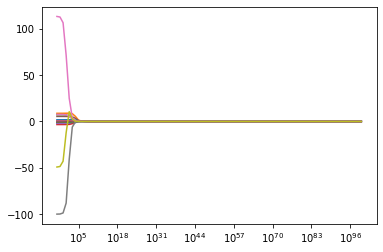

In [98]:
ax=plt.gca()
ax.plot(lambdalar,katsayılar);
ax.set_xscale("log") #xler lambda y ler katsayı bunlar arası ilişki grafiklendirildi

## Tahmin

In [99]:
ridge_model

Ridge(alpha=0.005)

In [100]:
ridge_model=Ridge().fit(x_train,y_train)
tahmin_y=ridge_model.predict(x_train)

In [101]:
tahmin_y[0:10]

array([ 376.25245449,  803.38498121,  496.17669652,  112.69554648,
        427.60020221, 1003.6309402 ,  153.45713944,  361.33880956,
        483.29143665,  916.91439669])

In [102]:
y_train[0:10]

183     125.0
229    1940.0
286     940.0
102     375.0
153     100.0
320     960.0
135      90.0
213     100.0
308     750.0
161     657.0
Name: Salary, dtype: float64

In [103]:
#train hatası
RMSE=np.sqrt(mean_squared_error(y_train,tahmin_y))

In [104]:
RMSE#bu valide edilmemiş doğrulanmamış

289.34470696006565

In [105]:
rmse=np.sqrt(np.mean(-cross_val_score(ridge_model,x_train,y_train,cv=10,scoring="neg_mean_squared_error")))

In [106]:
rmse #bu valide edilmiş doğrulanmış

351.3931585606319

In [107]:
#test hatası
y_tahmin=ridge_model.predict(x_test)
RMSE=np.sqrt(mean_squared_error(y_test,y_tahmin))
RMSE

356.8082905730238

## Model Tuning 

In [108]:
ridge_model=Ridge(100000).fit(x_train,y_train)
y_pred=ridge_model.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

369.9159886524666

In [109]:
lambdalar1=np.random.rand(0,1000,100)
lambdalar2=10**np.linspace(100,-2,100)*0.5

In [110]:
#alpha veya landa bu katsayılarla oynayan bi değer biz hatası az olanı seçip optimumu yakalıcaz ve bunu cv ile yaparız

In [111]:
ridgecv=RidgeCV(alphas=lambdalar2,scoring="neg_mean_squared_error",cv=10,normalize=True)

In [112]:
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([5.00000000e+99, 4.66301673e+98, 4.34874501e+97, 4.05565415e+96,
       3.78231664e+95, 3.52740116e+94, 3.28966612e+93, 3.06795364e+92,
       2.86118383e+91, 2.66834962e+90, 2.48851178e+89, 2.32079442e+88,
       2.16438064e+87, 2.01850863e+86, 1.88246790e+85, 1.75559587e+84,
       1.63727458e+83, 1.52692775e+82, 1.42401793e+81, 1.32804389e+80,
       1.23853818e+79, 1.15506485e+7...
       1.88246790e+17, 1.75559587e+16, 1.63727458e+15, 1.52692775e+14,
       1.42401793e+13, 1.32804389e+12, 1.23853818e+11, 1.15506485e+10,
       1.07721735e+09, 1.00461650e+08, 9.36908711e+06, 8.73764200e+05,
       8.14875417e+04, 7.59955541e+03, 7.08737081e+02, 6.60970574e+01,
       6.16423370e+00, 5.74878498e-01, 5.36133611e-02, 5.00000000e-03]),
        cv=10, normalize=True, scoring='neg_mean_squared_error')

In [113]:
ridgecv.alpha_#optimum alpha değeri

0.5748784976988702

In [114]:
# optimum değerle final modeli oluşturma

In [115]:
ridge_tuned=Ridge(alpha=ridgecv.alpha_).fit(x_train,y_train)

In [116]:
y_pred=ridge_tuned.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

356.90029126582743

# Lasso Regresyon

In [117]:
#burası ridgele aynı ama burda b^2 değil b nin mutlağını alpha ile çarparak cezayı uyguluyoruz

In [118]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.linear_model import RidgeCV,LassoCV

Veri Seti

In [119]:
df=pd.read_csv("Hitters.csv")
df=df.dropna()
dms=pd.get_dummies(df[["League","Division","NewLeague"]])
y=df["Salary"]
x_=df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
x=pd.concat([x_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [120]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [121]:
df.shape

(263, 20)

In [154]:
lasso_model=Lasso().fit(x_train,y_train)# modeli kurduk,alpha parametrisini girmediğimiz için kendisi 1 dedi

C:\Users\kadosama\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8256653.399850395, tolerance: 3898.686956380658
  model = cd_fast.enet_coordinate_descent(


In [125]:
lasso_model

Lasso()

In [164]:
lasso_model.alpha

1.0

In [126]:
lasso_model.intercept_#y eksenini kesen nokta

-5.5874506773361645

In [128]:
lasso_model.coef_#katsayılar

array([-1.74875691e+00,  8.59204135e+00,  6.67993798e+00, -3.06715333e+00,
       -1.91843070e+00,  5.32372890e+00,  8.39184117e+00, -1.63172447e-01,
       -8.22311277e-02, -3.93602861e-01,  1.71118530e+00,  6.55730545e-01,
       -6.48379405e-01,  2.59815358e-01,  2.73041157e-01, -4.41440454e-01,
        8.54474011e+01, -9.59701213e+01, -2.13086605e+01])

In [129]:
#farklı lambda değerlerin karşılık katsayılar(ridgede yaptığımız)

In [143]:
lasso=Lasso()
coefs=[]
lambdalar1=np.random.randint(0,10000,10)

for a in lambdalar1:
    lasso.set_params(alpha=a)
    lasso.fit(x_train,y_train)
    coefs.append(lasso.coef_)
    

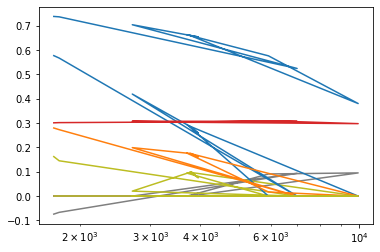

In [146]:
ax=plt.gca()
ax.plot(lambdalar1,coefs)
ax.set_xscale("log")#alpha ne kadar büyürse katsayı 0 a yaklaşır ridge de böyle yani belirli bi noktadan sonra 0 a yaklaşmaya başlar ridge bu katsayıyı tam 0 yapmıyo ama lasso da yapıyo

## Tahmin

In [148]:
lasso_model#alpha parametresi 1

Lasso()

In [152]:
lasso_model.predict(x_train)[0:5]#eğitim seti üzerinden tahmin(normalde burdan eğitim yapılır model kurulur tahmin edilir)

array([377.26270596, 786.51524513, 495.14140718, 117.19492966,
       429.04228506])

In [155]:
lasso_model.predict(x_test)[0:5]#test seti üserinden tahmin(bağımlı değişkeni bulma demek tahmin )

array([ 609.18826367,  696.96810702, 1009.06157391,  412.22773375,
        409.25851712])

In [151]:
#seti aslında 2 ye böldük 2 side veri setinin parçası

In [158]:
y_pred=lasso_model.predict(x_test)


In [160]:
np.sqrt(mean_squared_error(y_test,y_pred))#ilkel yani valide veya optimize edilmemiş test hatası

356.09758845540347

In [161]:
r2_score(y_test,y_pred)#makine yordamıyla r2 skrou hesaplama

0.41422798132366134

## Model Tuning 

In [175]:
lassocv_model=LassoCV(alphas=lambdalar1,cv=10,max_iter=100000).fit(x_train,y_train)
lassocv_model
#valide edilmiş alphayı bulma
#alpha vermessen kendi rastgele bi alpha bulur


LassoCV(alphas=array([3708, 5926, 9941, 3766, 3956, 3801, 2703, 6991, 1773, 1719]),
        cv=10, max_iter=100000)

In [176]:
lassocv_model.alpha_

2703

In [177]:
lassotuned=Lasso().set_params(alpha=lassocv_model.alpha_).fit(x_train,y_train)

In [178]:
lassotuned=Lasso(alpha=lassocv_model.alpha_).fit(x_train,y_train)#yukardakinin meali

In [179]:
y_pred=lassotuned.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

395.1049239368951

In [182]:
pd.Series(lassotuned.coef_,index=x_train.columns)#0 olanlar bağımlı değişken için etki etmeyen değişkenlerdir + yönlü - yönlü

AtBat          0.704449
Hits           0.000000
HmRun          0.000000
Runs           0.000000
RBI            0.000000
Walks          0.000000
Years         -0.000000
CAtBat        -0.000000
CHits          0.020447
CHmRun         0.000000
CRuns          0.419430
CRBI           0.199298
CWalks         0.000000
PutOuts        0.307855
Assists        0.000000
Errors        -0.000000
League_N       0.000000
Division_W    -0.000000
NewLeague_N    0.000000
dtype: float64

# ElasticNet Regresyon

In [184]:
#ridge ve lasso nun karışımı(birleşimi) ridge ve lasso nun alphaları kendilerine özel gene sadece bzi bunların 2 sininde kullanıyoruz ama sonunda bunları değerlendirip gene tek bi alphaya indiricez ve parametre olarak giricezz
#daha etkili doğla olarak

In [185]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.linear_model import RidgeCV,LassoCV,ElasticNetCV

Veri Seti

In [186]:
df=pd.read_csv("Hitters.csv")
df=df.dropna()
dms=pd.get_dummies(df[["League","Division","NewLeague"]])
y=df["Salary"]
x_=df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
x=pd.concat([x_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

## Model

In [187]:
enet_model=ElasticNet().fit(x_train,y_train)

C:\Users\kadosama\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8487984.79936731, tolerance: 3898.686956380658
  model = cd_fast.enet_coordinate_descent(


In [188]:
enet_model.intercept_

-6.465955602111762

In [189]:
enet_model.coef_

array([ -1.86256172,   8.70489065,   5.10426375,  -2.89875799,
        -1.28642985,   5.24343682,   6.04480276,  -0.14701495,
        -0.21566628,  -0.7897201 ,   1.80813117,   0.80914508,
        -0.61262382,   0.26816203,   0.27172387,  -0.36530729,
        19.2186222 , -31.16586592,   8.98369938])

## Tahmin

In [192]:
enet_model.predict(x_train)[0:10]

array([325.74706292, 776.06632333, 522.86508419, 107.64091955,
       449.03139566, 997.76095723,  99.78828622, 311.33763086,
       418.50335021, 879.9502608 ])

In [193]:
enet_model.predict(x_test)[0:10]

array([ 577.79111731,  617.33202224, 1031.39113156,  364.95861575,
        489.51894393,  300.74185842,  604.522666  ,  465.34678732,
        901.44473965,  703.20357123])

In [194]:
y_pred=enet_model.predict(x_test)

In [195]:
np.sqrt(mean_squared_error(y_test,y_pred))

357.16765481812445

In [197]:
r2_score(y_test,y_pred)

0.4107022246932692

## Model Tuning 

In [209]:
enet_cv_model=ElasticNetCV(alphas=lambdalar1,cv=10).fit(x_train,y_train)#en iyi alphayı seçti aralarından diğerlerinde olduğu gibi

In [210]:
enet_cv_model.alpha_

5926

In [211]:
enet_cv_model.intercept_

-29.07341313429447

In [212]:
enet_cv_model.coef_

array([ 0.60525682,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.11679811,  0.        ,
        0.24606964,  0.18449424,  0.00327706,  0.30961904,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        ])

In [213]:
#final modeli

In [214]:
enet_tuned=ElasticNet(alpha=enet_cv_model.alpha_).fit(x_train,y_train)#alphayı kendisi seçti

In [215]:
y_pred=enet_tuned.predict(x_test)

In [216]:
np.sqrt(mean_squared_error(y_test,y_pred))

393.91812936763665

In [217]:
?ElasticNet

In [218]:
#l1 ratio değeri ridge mı lasso  mı etkileme oranı alpha ise bahsettiğimiz lambdalar

In [219]:
#l1 ratio birleşme sonuçları alphaya yansır böylelikle modelin ayarlamasına da etki eder